In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def simulate_fixed_threshold(N, p_stop, tau, num_trials=10000):
    scores = []
    for _ in range(num_trials):
        house_values = np.random.uniform(0, 1, N)
        for i, x in enumerate(house_values):
            if x >= tau or np.random.rand() < p_stop:
                scores.append(x)
                break
    return np.mean(scores)

In [4]:
def simulate_exploration(N, p_stop, exploration_fraction=0.37, num_trials=10000):
    scores = []
    for _ in range(num_trials):
        house_values = np.random.uniform(0, 1, N)
        k = int(exploration_fraction * N)  # Number of houses to explore
        best_seen = max(house_values[:k])
        for i in range(k, N):
            if house_values[i] > best_seen or np.random.rand() < p_stop:
                scores.append(house_values[i])
                break
    return np.mean(scores)

In [8]:
# Parameters
N = 1000  # Expected number of visits (1/p_stop)
p_stop = 1/N  # Setting stopping probability accordingly
tau_values = np.linspace(0.5, 0.9, 10)

In [9]:
# Run simulations for different tau values
fixed_threshold_results = [simulate_fixed_threshold(N, p_stop, tau) for tau in tau_values]
exploration_result = simulate_exploration(N, p_stop)

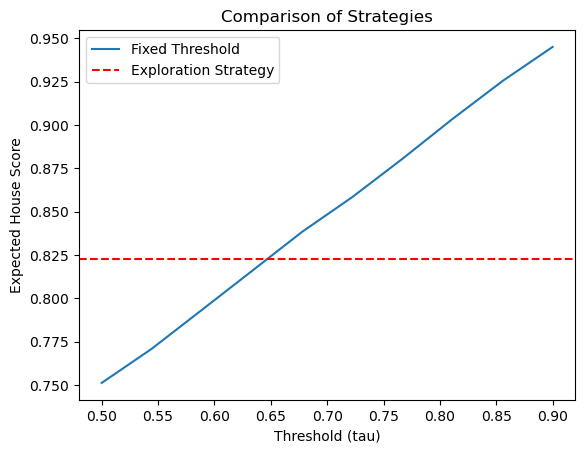

In [10]:
# Plot results
plt.plot(tau_values, fixed_threshold_results, label="Fixed Threshold")
plt.axhline(exploration_result, color='r', linestyle='--', label="Exploration Strategy")
plt.xlabel("Threshold (tau)")
plt.ylabel("Expected House Score")
plt.title("Comparison of Strategies")
plt.legend()
plt.show()